# Machine learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-packages" data-toc-modified-id="Import-necessary-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary packages</a></span></li><li><span><a href="#Read-the-datafile" data-toc-modified-id="Read-the-datafile-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the datafile</a></span><ul class="toc-item"><li><span><a href="#Select-the-top-ten-features" data-toc-modified-id="Select-the-top-ten-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Select the top ten features</a></span></li><li><span><a href="#Split-data-into-train-and-test-set" data-toc-modified-id="Split-data-into-train-and-test-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split data into train and test set</a></span></li></ul></li><li><span><a href="#Evaluation-of-different-classifiers" data-toc-modified-id="Evaluation-of-different-classifiers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation of different classifiers</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-neighbor-(KNN)" data-toc-modified-id="K-Nearest-neighbor-(KNN)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>K-Nearest neighbor (KNN)</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#Support-Vector-Machine-(SVM)" data-toc-modified-id="Support-Vector-Machine-(SVM)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Support Vector Machine (SVM)</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Naive Bayes</a></span></li></ul></li><li><span><a href="#Selection-of-the-best-model" data-toc-modified-id="Selection-of-the-best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selection of the best model</a></span></li><li><span><a href="#Tuning-the-threshold" data-toc-modified-id="Tuning-the-threshold-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tuning the threshold</a></span></li><li><span><a href="#Will-undersampling-perform-better?" data-toc-modified-id="Will-undersampling-perform-better?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Will undersampling perform better?</a></span></li><li><span><a href="#Will-over-sampling-using-SMOTE-perform-better?" data-toc-modified-id="Will-over-sampling-using-SMOTE-perform-better?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Will over-sampling using SMOTE perform better?</a></span></li><li><span><a href="#Data-quantity-assessment" data-toc-modified-id="Data-quantity-assessment-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data quantity assessment</a></span></li></ul></div>

## Import necessary packages

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import ShuffleSplit
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
#to ensure clean outputs ignore the warning messages 
import warnings
warnings.filterwarnings('ignore')

## Read the datafile

In [2]:
df = pd.read_csv('03_FE_CHD_data.csv')
df.head()

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,age_group,TenYearCHD
0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,-0.684211,-0.818605,-0.800000,0.320726,0.357143,-0.0625,-1.0,0
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.280702,-0.260465,-0.066667,0.675744,1.428571,-0.1250,0.0,0
2,1.0,-0.5,1.0,1.00,0.0,0.0,0.0,0.0,0.192982,-0.018605,-0.133333,-0.008069,0.000000,-0.5000,0.0,0
3,0.0,0.5,1.0,1.50,0.0,0.0,1.0,0.0,-0.157895,0.818605,0.866667,0.645487,-0.714286,1.5625,2.0,1
4,0.0,0.5,1.0,1.15,0.0,0.0,0.0,0.0,0.894737,0.074419,0.133333,-0.459909,0.714286,0.4375,0.0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3658.0,0.443685,0.496886,0.000000,0.000000,0.0,1.000000,1.000000
education,3658.0,-0.009841,0.511328,-0.500000,-0.500000,0.0,0.500000,1.000000
currentSmoker,3658.0,0.489065,0.499949,0.000000,0.000000,0.0,1.000000,1.000000
cigsPerDay,3658.0,0.451271,0.596080,0.000000,0.000000,0.0,1.000000,3.500000
BPMeds,3658.0,0.030344,0.171557,0.000000,0.000000,0.0,0.000000,1.000000
prevalentStroke,3658.0,0.005741,0.075561,0.000000,0.000000,0.0,0.000000,1.000000
prevalentHyp,3658.0,0.311646,0.463229,0.000000,0.000000,0.0,1.000000,1.000000
diabetes,3658.0,0.027064,0.162292,0.000000,0.000000,0.0,0.000000,1.000000
totChol,3658.0,0.049960,0.773644,-2.122807,-0.491228,0.0,0.508772,6.421053
sysBP,3658.0,0.162625,0.821837,-1.655814,-0.409302,0.0,0.590698,6.213953


### Select the top ten features

In [4]:
top_10_features = ['sysBP', 'BMI', 'totChol', 'glucose', 'diaBP', 'heartRate', 'age_group', 'cigsPerDay', 'education', 'gender']

In [5]:
X = df[top_10_features]

In [6]:
#target variable
y = df.TenYearCHD

### Split data into train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

## Evaluation of different classifiers

Here, I am going to evaluate six different models. For each of these model, I will perform hyperparameter tuning using grid search. I will select the model that yield the higest ROC-AUC score.

### K-Nearest neighbor (KNN)

In [8]:
#run KNN model
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5, n_jobs =4, scoring = 'roc_auc')
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='roc_auc')

In [9]:
print("Best Parameters: " + str(knn_cv.best_params_))

Best Parameters: {'n_neighbors': 42}


In [10]:
#compute roc_auc for the best hyperparameter
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_knn_test= cv_scores_test.mean()
print(cv_scores_knn_test)

0.696594342789995


### Logistic regression

In [11]:
#run logistic regression model
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001,0.01,0.1,1,5,10,100], 'solver': ['liblinear']}
logreg = LogisticRegression()
logreg_cv= GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [12]:
print("Best Parameters: " + str(logreg_cv.best_params_))

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [13]:
#compute roc_auc for train and test set
logreg = LogisticRegression(penalty = 'l1', C=1, solver='liblinear')
logreg.fit(X_train,y_train)
cv_scores_test= cross_val_score(logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_logreg_test= cv_scores_test.mean()
print(cv_scores_logreg_test)

0.7324493872754742


### Random forest

In [14]:
#run random forest model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,6,7,8,9,10,15],
    'n_estimators': [10, 50, 100, 200, 300]
}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 15],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='roc_auc')

In [15]:
print("Best Parameters: " + str(rf_cv.best_params_))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}


In [16]:
#compute roc_auc for train and test set
rf = RandomForestClassifier(criterion = 'gini', max_depth=5, n_estimators=100)
rf.fit(X_train,y_train)
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
print(cv_scores_rf_test)

0.7131049185831795


### Gradient Boosting

In [17]:
#run gradient boosting
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,200,500,1000],
              'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [100,150],'max_features': [0.3, 0.1]}
GB = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
GB_cv= GridSearchCV(estimator=GB, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
GB_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='roc_auc')

In [18]:
print("Best Parameters: " + str(GB_cv.best_params_))

Best Parameters: {'learning_rate': 0.005, 'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 150, 'n_estimators': 500}


In [19]:
#compute roc_auc for train and test set
GB = GradientBoostingClassifier(learning_rate=0.005, max_depth= 5, max_features= 0.1, min_samples_leaf= 150, n_estimators= 500)
GB.fit(X_train,y_train)
cv_scores_test= cross_val_score(GB,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_gbc_test= cv_scores_test.mean()
print(cv_scores_gbc_test)

0.7166414302501259


### Support Vector Machine (SVM)

In [20]:
#run support vector machine model
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
 ]
svm = SVC()
svm_cv= GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs =4, scoring = 'roc_auc')
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

In [21]:
print("Best Parameters: " + str(svm_cv.best_params_))

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [22]:
#compute roc_auc for train and test set
svm = SVC(C=10, kernel = 'rbf', gamma=0.001, probability=True)
svm.fit(X_train,y_train)
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_svm_test= cv_scores_test.mean()
print(cv_scores_svm_test)

0.6677085781433607


### Naive Bayes

In [23]:
#run Naive Bayes
GB = GaussianNB()
GB.fit(X_train,y_train)
cv_scores_test= cross_val_score(GB,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_nb_test= cv_scores_test.mean()
print(cv_scores_nb_test)

0.7182848749370488


## Selection of the best model

In [24]:
#prepare table to show ROC-AUC score for different model
myLabels = ['KNN','Logistic Regression','Random Forest','Gradient Boost','SVM', 'Naive Bayes']
score_test= [cv_scores_knn_test, cv_scores_logreg_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_svm_test, cv_scores_nb_test]

score_tab = pd.DataFrame(list(zip(myLabels, score_test)), 
               columns =['Algorithm', 'ROC-AUC score']) 
score_tab.sort_values("ROC-AUC score", ascending=False, inplace=True)
score_tab


,Algorithm,ROC-AUC score
1,Logistic Regression,0.732449
5,Naive Bayes,0.718285
3,Gradient Boost,0.716641
2,Random Forest,0.713105
0,KNN,0.696594
4,SVM,0.667709


When I evaluated different algorithm, I found that __logistic regression__ performed best based on roc_auc score with roc_auc score of 0.73.

In [25]:
#get the roc_auc_score
y_pred_prob=logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.7420708868596193

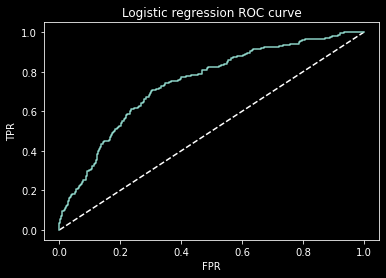

In [26]:
#plot roc curve
plt.style.use("dark_background")
fpr,tpr,thresholds=roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1], 'k--',color='white')
plt.plot(fpr,tpr,label='logreg')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic regression ROC curve')
plt.show()

In [27]:
#lets check the scoring metrics of logistic regression in more detail
logreg = LogisticRegression(penalty = 'l2', C=0.1, solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       923
           1       0.73      0.06      0.12       175

    accuracy                           0.85      1098
   macro avg       0.79      0.53      0.52      1098
weighted avg       0.83      0.85      0.79      1098

[[919   4]
 [164  11]]


There is an issue with this prediction. The above model has done pretty well in predicting the true negatives. However, the model does miserably poor jobs in predicting the true postives. This is an issue of imbalanced dataset. Our data is highly imbalanced and in such instance, default decision threshold generally performs poorly. Therefore, in the next step, I will tune the threshold to improve recall of the model.

## Tuning the threshold

In this project, I am more interested to correctly identify the people with CHD. That is, I want to maximize the recall value. However, the recall value for positive cases (occurrence of CHD) is very low (0.06). Therefore, in the next step, I will identify the threshold at which the F1 score is maximum by giving more weight to recall (beta = 2) 

In [28]:
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

In [29]:
# Calculate F1 Score Curve
f_beta = []
thresholds = np.arange(0, 1, 0.001)
for t in thresholds:
    adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=t)
    f = fbeta_score(y_test, adjusted_y_pred, beta=2)
    f_beta.append(f)

max_score = max(f_beta)
max_index = f_beta.index(max_score)
print(max_score)
print('optimum threshold', thresholds[max_index])

0.5637467476149177
optimum threshold 0.148


In [30]:
#classification report
y_pred = (logreg.predict_proba(X_test)[:,1] >= 0.168).astype('int')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       923
           1       0.30      0.73      0.42       175

    accuracy                           0.68      1098
   macro avg       0.61      0.70      0.60      1098
weighted avg       0.83      0.68      0.72      1098

[[621 302]
 [ 47 128]]


# Plot demonstrating F1 score, precision and recall at different thresholds

In [31]:
pred_prob_lr = logreg.predict_proba(X_test)[:,1]

In [32]:
# Calculate Precision and Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
thresholds = np.append(thresholds, 1)

In [33]:
# Calculate F2 Score Curve
f2_points = []

for t in thresholds:
        adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=t)
        new_f2 = fbeta_score(y_test, adjusted_y_pred, beta = 2)
        f2_points.append(new_f2)

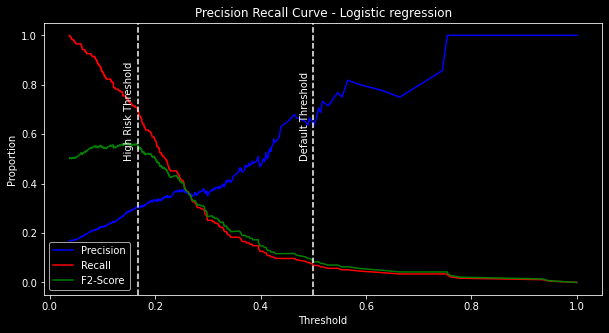

In [34]:
#plot precision, recall and F2 score for various threshold
plt.figure(figsize=(10,5))
plt.plot(thresholds, precision, color='blue')
plt.plot(thresholds, recall, color='red')
plt.plot(thresholds, f2_points, color='green')
plt.title('Precision Recall Curve - Logistic regression')
plt.legend(('Precision', 'Recall', 'F2-Score'))
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.axvline(x=.168, color='white', linestyle='--')
plt.text(.14,.50,'High Risk Threshold',rotation=90)
plt.axvline(x=.50, color='white', linestyle='--')
plt.text(.475,.50,'Default Threshold',rotation=90)
plt.show()

## Will undersampling perform better?

In [35]:
#split data into train and test set
X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

In [36]:
#join the training dataset
new_df = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

In [37]:
#count the number of rows for each class
new_df.TenYearCHD.value_counts()

0    2178
1     382
Name: TenYearCHD, dtype: int64

In [38]:
# Shuffle the new df
shuffled_df = new_df.sample(frac=1,random_state=4)
# Put all the CHD in a separate dataset
CHD_df = new_df.loc[new_df['TenYearCHD'] == 1]

In [39]:
#Randomly select 437 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=382,random_state=42)

# Concatenate both dataframes again
resampled_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
resampled_df.TenYearCHD.value_counts()

0    382
1    382
Name: TenYearCHD, dtype: int64

In [40]:
#new training dataset for undersampling
X_train = resampled_df.drop('TenYearCHD', axis=1)
y_train = resampled_df.TenYearCHD

In [41]:
#run various machine learning model and compute roc-auc score
models = [
          ('KNN', KNeighborsClassifier()),      
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier()),
          ('SVM', SVC()),
          ('Naive Bayes', GaussianNB())
            ]
    
names=[]
roc_auc_score = []
for name, model in models:
    model.fit(X_train, y_train)
    cv_scores_test= cross_val_score(model,X_test,y_test,cv=5,scoring='roc_auc')
    cv_scores_test_mean= cv_scores_test.mean()
    names.append(name)
    roc_auc_score.append(cv_scores_test_mean)

score = pd.DataFrame([names, roc_auc_score]).T
score.columns = ['Algorithm', 'Roc_auc_score']
score.sort_values("Roc_auc_score", ascending=False, inplace=True)
score

,Algorithm,Roc_auc_score
1,Logistic Regression,0.72788
5,Naive Bayes,0.709182
3,Gradient Boost,0.694836
2,Random Forest,0.676938
4,SVM,0.597167
0,KNN,0.577551


In [42]:
#fit the best model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       923
           1       0.28      0.73      0.40       175

    accuracy                           0.65      1098
   macro avg       0.60      0.68      0.58      1098
weighted avg       0.82      0.65      0.70      1098

[[589 334]
 [ 47 128]]


In [43]:
# Calculate F2 Score Curve
y_pred_prob=logreg.predict_proba(X_test)[:,1]
f_beta = []
thresholds = np.arange(0, 1, 0.001)
for t in thresholds:
    adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=t)
    f = fbeta_score(y_test, adjusted_y_pred, beta=2)
    f_beta.append(f)

max_score = max(f_beta)
max_index = f_beta.index(max_score)
print(max_score)
print('optimum threshold', thresholds[max_index])

0.5628058727569332
optimum threshold 0.458


In [44]:
#calssification report
y_pred = (logreg.predict_proba(X_test)[:,1] >= 0.458).astype('int')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.58      0.72       923
           1       0.26      0.79      0.39       175

    accuracy                           0.61      1098
   macro avg       0.60      0.68      0.55      1098
weighted avg       0.83      0.61      0.66      1098

[[535 388]
 [ 37 138]]


Logistic regression with Undersampling did not perform better than the complete dataset.

## Will over-sampling using SMOTE perform better?

In [45]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 3101, 1: 557})


In [46]:
#split data into train and test sample
X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Before oversampling training dataset shape %s' % Counter(y_train))

Before oversampling training dataset shape Counter({0: 2185, 1: 375})


In [47]:
#oversample the training set
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))


Resampled dataset shape Counter({0: 2185, 1: 2185})


In [48]:
#run various machine learning model and compute roc-auc score
models = [
          ('KNN', KNeighborsClassifier()),      
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boost', GradientBoostingClassifier()),
          ('SVM', SVC()),
          ('Naive Bayes', GaussianNB())
            ]
    
names=[]
roc_auc_score = []
for name, model in models:
    model.fit(X_train, y_train)
    cv_scores_test= cross_val_score(model,X_test,y_test,cv=5,scoring='roc_auc')
    cv_scores_test_mean= cv_scores_test.mean()
    names.append(name)
    roc_auc_score.append(cv_scores_test_mean)

score = pd.DataFrame([names, roc_auc_score]).T
score.columns = ['Algorithm', 'Roc_auc_score']
score.sort_values("Roc_auc_score", ascending=False, inplace=True)
score

,Algorithm,Roc_auc_score
1,Logistic Regression,0.744788
5,Naive Bayes,0.740123
2,Random Forest,0.710177
3,Gradient Boost,0.686513
4,SVM,0.659956
0,KNN,0.610288


In [49]:
#fit the best model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       916
           1       0.30      0.74      0.43       182

    accuracy                           0.67      1098
   macro avg       0.61      0.70      0.60      1098
weighted avg       0.82      0.67      0.71      1098

[[601 315]
 [ 47 135]]


In [50]:
# Calculate F1 Score Curve
y_pred_prob=logreg.predict_proba(X_test)[:,1]
f_beta = []
thresholds = np.arange(0, 1.041, 0.001)
for t in thresholds:
    adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=t)
    f = fbeta_score(y_test, adjusted_y_pred, beta=2)
    f_beta.append(f)

max_score = max(f_beta)
max_index = f_beta.index(max_score)
print(max_score)
print('optimum threshold', thresholds[max_index])

0.5809731299927378
optimum threshold 0.392


In [51]:
#classification report
y_pred = (logreg.predict_proba(X_test)[:,1] >= 0.392).astype('int')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.47      0.63       916
           1       0.25      0.88      0.39       182

    accuracy                           0.53      1098
   macro avg       0.60      0.67      0.51      1098
weighted avg       0.83      0.53      0.59      1098

[[427 489]
 [ 22 160]]


Logistic regression with oversampling also did not perform better than the complete dataset. Therefore, our final model is logistic regression with full dataset using threshold of 0.168.

## Data quantity assessment

In [52]:
def plot_learning_curve(estimator, title, X, y, ylim, cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
    plt.legend(loc="best")
    return plt

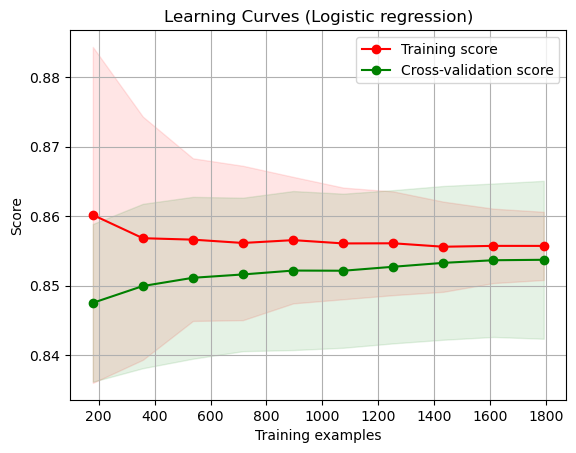

In [53]:
#plot learning curve
X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
title = "Learning Curves (Logistic regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = LogisticRegression(penalty = 'l1', C=1, solver='liblinear', random_state=1)
plt.style.use('default')

plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.8, 1),
                    cv=cv, n_jobs=4)

plt.show()

The above plot shows that training and cross-validation scores are converging together which suggest that additional data will probably not imporove the model.